In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

- at this point, you've built and trained deep neural networks from the ground up
  - congratulations; this is an amazing set of skills with a wide range of applications
- however, deep learning engineers often don't actually start with a blank slate when they're building neural networks


- starting from scratch can be time-consuming
  - it's not just architecting the network, but also experimenting with it, training it and adjusting it, which can take days or even weeks
  - to accelerate the process, engineers often begin with a pre-trained network and then modify it
  - fine-tuning an existing network is a powerful technique because improving a network takes much less effort than creating one from scratch
  - going even further, we can take an existing network and re-purpose it for a related but different task


- re-purposing a network is called **Transfer Learning** because you're transferring the learning from an existing network to a new one
- to learn more about why Transfer Learning is so important for building deep neural networks, we're going to get some advice from Bryan Cantanzaro, a deep learning expert in NVIDIA

- you might think of GPUs as devices built for rendering graphically intensive video games, and that's true
- but GPUs have also become extraordinarily important for deep learning
- CPUs are mostly optimized for latency, running a single thread of instructions as quickly as possible
- GPUs are optimized for throughput computation, running as many simultaneous computations as possible

<img src="resources/cpu_vs_gpu_1.png">

- throughput computing is important for computer graphics because we want to update lots of pixels on the screen at the same time
- it turns out that throughput computing is also important for deep learning because the computations fundamental to deep learning have a lot of parallelism


- what level of acceleration do you typically see when you move from training a network on a CPU to a GPU?
  - it depends on a lot of factors, including how the software we're running has been designed, and the precise CPU and GPU we're comparing
    - for example, the low power processor in your laptop is going to be much slower than a big server processor
  - but a rule of thumb would be that networks train about five times faster on a GPU than on a CPU


- the chart below gives a general idea of how, over time, GPU performance has increased faster than CPU performance
  - the data is based on a comparison of NVIDIA GPUs and Intel CPUs

<img src="resources/cpu_vs_gpu_2.png">

# Transfer Learning

- when you're tackling a new problem with a neural network, it might help to start with an existing network that was built for a similar task and then try to fine-tune it for your own problem
- there are a couple of good reasons to do this
  - first, existing neural networks can be really useful
    - if somebody has taken days or weeks to train a network already, then a lot of intelligence is stored in that network
    - taking advantage of that work can accelerate your own progress
  - second, sometimes the data set for the problem you'll work on might be small
    - in those cases, look for an existing network that's designed for a problem similar to your own
    - if that network has already been trained on a larger data set, then you can use it as a starting point to help your own network generalize better
- in order to do this, it makes sense to learn a little bit about the most prominent pre-trained networks that already exist

- transfer learning involves taking a pre-trained neural network and adapting the neural network to a new, different data set
- the approach for using transfer learning will be different, depending on both:
  - the size of the new data set, and
  - the similarity of the new data set to the original data set
- there are four main cases:
  - new data set is small, new data is similar to original training data
  - new data set is small, new data is different from original training data
  - new data set is large, new data is similar to original training data
  - new data set is large, new data is different from original training data

<img src="resources/four_cases_transfer_learning.png">

- a large data set might have one million images
- a small data could have two-thousand images
- the dividing line between a large data set and small data set is somewhat subjective
- overfitting is a concern when using transfer learning with a small data set


- images of dogs and images of wolves would be considered similar; the images would share common characteristics
- a data set of flower images would be different from a data set of dog images

## Demonstration Network

- to explain how each situation works, we will start with a generic pre-trained convolutional neural network and explain how to adjust the network for each case
- our example network contains three convolutional layers and three fully connected layers:

<img src="resources/demonstration_network.png">

- here is an generalized overview of what the convolutional neural network does:
  - the first layer will detect edges in the image
  - the second layer will detect shapes
  - the third convolutional layer detects higher level features


- each transfer learning case will use the pre-trained convolutional neural network in a different way

## Case 1: Small Data Set, Similar Data

<img src="resources/case1_small_dataset_similar_data.png">

- if the new data set is small and similar to the original training data:
  - slice off the end of the neural network
  - add a new fully connected layer that matches the number of classes in the new data set
  - randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
  - train the network to update the weights of the new fully connected layer


- to avoid overfitting on the small data set, the weights of the original network will be held constant rather than re-training the weights
- since the data sets are similar, images from each data set will have similar higher level features
  - therefore most or all of the pre-trained neural network layers already contain relevant information about the new data set and should be kept


- here's how to visualize this approach:

<img src="resources/case1_small_dataset_similar_data_visualize.png">

## Case 2: Small Data Set, Different Data

<img src="resources/case2_small_dataset_different_data.png">

- if the new data set is small and different from the original training data:
  - slice off most of the pre-trained layers near the beginning of the network
  - add to the remaining pre-trained layers a new fully connected layer that matches the number of classes in the new data set
  - randomize the weights of the new fully connected layer; freeze all the weights from the pre-trained network
  - train the network to update the weights of the new fully connected layer


- because the data set is small, overfitting is still a concern
  - to combat overfitting, the weights of the original neural network will be held constant, like in the first case
- but the original training set and the new data set do not share higher level features
  - in this case, the new network will only use the layers containing lower level features


- here is how to visualize this approach:

<img src="resources/case2_small_dataset_different_data_visualize.png">

## Case 3: Large Data Set, Similar Data

<img src="resources/case3_large_dataset_similar_data.png">

- if the new data set is large and similar to the original training data:
  - remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
  - randomly initialize the weights in the new fully connected layer
  - initialize the rest of the weights using the pre-trained weights
  - re-train the entire neural network


- overfitting is not as much of a concern when training on a large data set; therefore, you can re-train all of the weights
- because the original training set and the new data set share higher level features, the entire neural network is used as well


- here is how to visualize this approach:

<img src="resources/case3_large_dataset_similar_data_visualize.png">

## Case 4: Large Data Set, Different Data

<img src="resources/case4_large_dataset_different_data.png">

- if the new data set is large and different from the original training data:
  - remove the last fully connected layer and replace with a layer matching the number of classes in the new data set
  - retrain the network from scratch with randomly initialized weights
  - alternatively, you could just use the same strategy as the "large and similar" data case


- even though the data set is different from the training data, initializing the weights from the pre-trained network might make training faster
  - so this case is exactly the same as the case with a large, similar data set
- if using the pre-trained network as a starting point does not produce a successful model, another option is to randomly initialize the convolutional neural network weights and train the network from scratch


- here is how to visualize this approach:

<img src="resources/case4_large_dataset_different_data_visualize.png">

# ImageNet

- by the late aughts (the terms "aughts" or "oughts" refers to the first decade of a century; in this context the "late aughts" refers to the latter part of the first decade of the 2000's), the Internet had made it easier to generate and collect images, storage costs had dropped so that it was cheap to save large collections of images, and services like Amazon's Mechanical Turk had even made it more cost-effective to label images
  - that confluence of factors gave rise to ImageNet, a huge database of hand-labeled images
  - and the ImageNet database gave rise to the ImageNet Large Scale Visual Recognition Competition
    - the ImageNet Large Scale Visual Recognition Competition is most famous as an annual competition, where teams from industry and academia try to build the best networks for object detection and localization
    - this spurred really intense competition between teams in industry and academia to produce the best image classification network
    - as these teams published their approaches, we learned a lot about the best ways to build neural networks
    - the first big breakthrough was in 2012, when the winning submission really changed the field; it was called AlexNet, and it looked a lot like Yann LeCun's neural network from way back in 1998

- ImageNet was its own competition from 2012-2017, but now it's hosted on [Kaggle](https://www.kaggle.com/c/imagenet-object-localization-challenge)
- there are 1,000 different image categories between over 14 million images, so it's a great way to get involved with large datasets


- pre-training a network with the ImageNet dataset is a very common way to get a strong neural network that can be used for transfer learning
- with recent versions of Keras, you can easily import a pre-trained network by using the [Keras Applications](https://keras.io/applications/) models

# AlexNet

- AlexNet was developed at the University of Toronto by Alex Krizhevsky, Ilya Sutskever and their professor Geoffrey Hinton
- although the fundamental architecture of AlexNet resembled LeNet from 1998, AlexNet was a breakthrough in several respects
  - first and foremost, AlexNet used the massive parallelism afforded by GPUs to accelerate training
  - using the best GPUs available in 2012, the AlexNet team was able to train the network in about a week
  - additionally, AlexNet pioneered the use of Rectified Linear Units as an activation function and dropout as a technique for avoiding overfitting


- in 2011, the year before AlexNet was developed, the winner of the ImageNet competition successfully classified 74% of images, or in the terminology of the competition, its error was 26%
- the next year, AlexNet lowered its error to 15%
  - this was a huge leap forward

- AlexNet puts the network on two GPUs, which allows for building a larger network
- although most of the calculations are done in parallel, the GPUs communicate with each other in certain layers
- the [original research paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf) on AlexNet said that parallelizing the network decreased the classification error rate by 1.7% when compared to a neural network that used half as many neurons on one GPU

<img src="resources/alexnet.png">

- AlexNet is still used today as a starting point for building and training neural networks
- actually, engineers typically use a simplified version of AlexNet because in recent years we've discovered that some of AlexNet's features aren't really necessary, and so they've been removed
  - but most implementations of AlexNet that you'll find online reflect these changes
- since AlexNet, a number of newer networks have been developed with even higher accuracy but AlexNet is still one of the best understood and most widely used starting points for Computer Vision

# VGG

- in 2014, two different groups nearly tied in the ImageNet competition with the seven percent classification error
- one of those networks is called VGGnet, or sometimes just VGG, and it came from the Visual Geometry Group at Oxford University


- VGG has a simple and elegant architecture, which makes it great for transfer learning
- the VGG architecture is just a long sequence of three-by-three convolutions, broken up by two-by-two pooling layers, and finished by a trio of fully-connected layers at the end


- lots of engineers use VGG as a starting point for working on other image classification tasks, and it works really well
- the flexibility of VGG is one of its great strengths


- you can find the original VGG paper [here](https://arxiv.org/pdf/1409.1556.pdf)

## VGG in Keras

- as we mentioned earlier, you can fairly quickly utilize a pre-trained model with [Keras Applications](https://keras.io/applications/)
- VGG16 is one of the built-in models supported
- there are actually two versions of VGG, VGG16 and VGG19 (where the numbers denote the number of layers included in each respective model), and you can utilize either with Keras, but we'll work with VGG16 here

```python
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet', include_top=False)
```

- there are two arguments to `VGG16` in this example, although there could be more or less (check out the linked documentation to see other possible arguments)
  - the first, `weights='imagenet'`, loads the pre-trained ImageNet weights
    - this is actually the default argument per the documentation, so if you don't include it, you should still be loading the ImageNet weights
    - however, you can also specify `None` here to get random weights if you just want the architecture of VGG16; this is not suggested here since you won't get the benefit of transfer learning
  - the argument `include_top` is for whether you want to include the fully-connected layer at the top of the network; unless you are actually trying to classify ImageNet's 1,000 classes, you likely want to set this to `False` and add your own additional layer for the output you desire

## Pre-processing for ImageNet weights

- there is another item to consider before jumping into using an ImageNet pre-trained model
- these networks are typically pre-trained with a specific type of pre-processing, so you need to make sure to use the same pre-processing steps, or your network's outputs will likely be erratic


- VGG uses 224x224 images as input, so that's another thing to consider

```python
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

img_path = 'your_image.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
```

## Demo: Using VGG with Keras

- below, you'll be able to check out the predictions from an ImageNet pre-trained VGG network with Keras

['resources/VGG/dog_labrador.jpg', 'resources/VGG/elephant.jpg', 'resources/VGG/zebra.jpg']


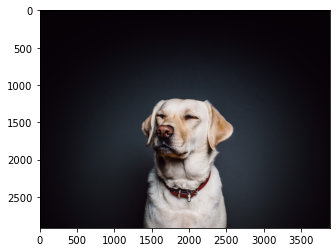

<IPython.core.display.Javascript object>

In [2]:
# Load our images first, and we'll check what we have
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

image_paths = glob("resources/VGG/*.jpg")

# Print out the image paths
print(image_paths)

# View an example of an image
example = mpimg.imread(image_paths[0])
plt.imshow(example)
plt.show()

In [3]:
# Here, we'll load an image and pre-process it
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

i = 0  # Can change this to your desired image to test
img_path = image_paths[i]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Using TensorFlow backend.


<IPython.core.display.Javascript object>

- note that the `image.load_img()` function will re-size our image to 224x224 as desired for input into this VGG16 model, so the images themselves don't have to be 224x224 to start

- we won't throw out the top fully-connected layer this time when we load the model, as we actually want the true ImageNet-related output
- however, you'll learn how to do this in a later lab
- the inference will be a little slower than you might expect here as we are not using GPU just yet


- note also the use of `decode_predictions` which will map the prediction to the class name

In [4]:
# Note - this will likely need to download a new version of VGG16
from keras.applications.vgg16 import VGG16, decode_predictions

# Load the pre-trained model
model = VGG16(weights="imagenet")

# Perform inference on our pre-processed image
predictions = model.predict(x)

# Check the top 3 predictions of the model
print("Predicted:", decode_predictions(predictions, top=3)[0])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Predicted: [('n02100735', 'English_setter', 0.24644804), ('n02109047', 'Great_Dane', 0.1824823), ('n02092339', 'Weimaraner', 0.116603255)]


<IPython.core.display.Javascript object>

- you should mostly get the correct answers here
- in our own run, it predicted a Tusker elephant with an African elephant in second place (the image is of an African elephant), correctly selected a labrador, and very confidently predicted a zebra
- you can add some of your own images into the images folder by clicking on the jupyter logo in the top left and see how it performs on your own examples!

# Empirics

- deep learning is a hands on empirical field
- the more experiments that we engineers and researchers try, the more ideas we generate and some of them actually turn out to work
- other ideas that seem promising initially don't work
- the practice is definitely ahead of the theory in many cases so it's important not to get too attached to theories about different network architectures or exactly what layer follows another in a network, instead to be a successful deep learning practitioner, you need a bias towards action


- experiment to answer your questions rather than just thinking deep thoughts
- also, don't be too discouraged if something doesn't work immediately the first time you try it
- keep experimenting until you find a network and hyper parameters that work for your problem


- I like to think of deep learning as one of the few places in computer science where we actually do science
- most of computer science is really more about engineering, but in deep learning we really do spend a lot of time running experiments and building theories of what works and why, just like real scientists
- I would say that does make us real scientists
  - you're learning about several important network architectures that you can use as a basis for your own projects
  - but more important than the intricacies of these networks, is to get your hands dirty and try to solve real problems
    - this will develop your confidence and give you practical skills

# GoogLeNet

- in 2014, Google published its own network in the ImageNet competition and in homage to Yann LeCun and LeNet, Google named their network, wait for it, GoogLeNet
  - it's spelled like GoogleNet but it's pronounced GoogLeNet
- in the ImageNet competition, GoogLeNet performed even a little better than VGG: 6.7% compared to 7.3% percent, although at that level, it kind of feels like we're splitting hairs


- GoogLeNet's great advantage is that it runs really fast
- the team that developed GoogLeNet developed a clever concept called an Inception module, which trains really well and is efficiently deployable
  - do you remember inception? Vincent explained the concept earlier
  - as Vincent says, the inception modules create a situation in which the total number of parameters is very small
    - this is why GoogLeNet runs almost as fast as AlexNet
  - and of course GoogLeNet has great accuracy
    - like we mentioned earlier, it's ImageNet error was only 7%
- GoogLeNet is a great choice to investigate if you need to run your network in real time, like maybe in a self-driving car


- you can find the original GoogLeNet/Inception paper [here](https://arxiv.org/pdf/1409.4842.pdf)

## GoogLeNet/Inception in Keras

- inception is also one of the models included in [Keras Applications](https://keras.io/applications/)
- utilizing this model follows pretty much the same steps as using VGG, although this time you'll use the `InceptionV3` architecture

```python
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3(weights='imagenet', include_top=False)
```

- don't forget to perform the necessary pre-processing steps to any inputs you include!
- while the original Inception model used a $224x224$ input like VGG, InceptionV3 actually uses a $299x299$ input

# ResNet

- the 2015 ImageNet winner was a network from Microsoft Research called ResNet
- ResNet claim to fame is that it has a massive 152 layers
  - for contrast, AlexNet has 5 layers, VGG has 19 layers, and GoogLeNet has 22 layers
- ResNet is kinda like VGG in that the same structure is repeated again and again for layer after layer
  - the main idea was to add connections to the neural network that skip layers so that very deep neural networks could practically be trained
- ResNet achieves a loss of only $3\%$ on ImageNet which is actually better than normal human accuracy


- you can find the original ResNet paper [here](https://arxiv.org/pdf/1512.03385.pdf)

## ResNet in Keras

- as you may have guessed, ResNet is also a model included in [Keras Applications](https://keras.io/applications/), under `ResNet50`

```python
from keras.applications.resnet50 import ResNet50

model = ResNet50(weights='imagenet', include_top=False)
```

- again, you'll need to do ImageNet-related pre-processing if you want to use the pre-trained weights for it
- ResNet50 has a $224x224$ input size

# Without Pre-trained Weights

- so far, you've seen the effectiveness of models pre-trained on ImageNet weights, but what if we specify `weights=None` when we load a model?
  - well, you'll instead be randomly initializing the weights, as if you had built a model on your own and were starting from scratch


- from our chart before, there are few situations where this might even be a potential use case - basically, when you have data that is very different from the original data
- however, given the large size of the ImageNet dataset (remember, it's over 14 million images from 1,000 classes!), it's highly unlikely this is really the case - it will almost always make the most sense to start with ImageNet pre-trained weights, and only fine-tune from there

## Demo: VGG without Pre-trained Weights

- below, you'll see how setting `weights=None` is equivalent to an un-trained network

In [5]:
# Load our images first, and we'll check what we have
from glob import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

image_paths = glob("resources/VGG/*.jpg")

i = 2  # Can change this to your desired image to test
img_path = image_paths[i]
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

<IPython.core.display.Javascript object>

- this time, we won't use the pre-trained weights, so we'll likely get some wacky predictions

In [6]:
# Note - this will likely need to download a new version of VGG16
from keras.applications.vgg16 import VGG16, decode_predictions

# Load VGG16 without pre-trained weights
model = VGG16(weights=None)

# Perform inference on our pre-processed image
predictions = model.predict(x)

# Check the top 3 predictions of the model
print("Predicted:", decode_predictions(predictions, top=3)[0])

Predicted: [('n06794110', 'street_sign', 0.0018124937), ('n01616318', 'vulture', 0.0017637638), ('n01855672', 'goose', 0.001657444)]


<IPython.core.display.Javascript object>

- when we ran each image, we got wrong answers
- a little bit different than the elephant, labrador and zebra they are supposed to be!

# Outro

- AlexNet, VGG, Google LeNet and ResNet are important neural network architectures you might want to use in future projects
- even if you build your own neural network from scratch, you'll still want to fine tune it
  - you can save your network as you train and then come back later to experiment with new data and additional layer or different hyper parameters


- as you proceed to the final project, think about how you might use all of the techniques you learned, including convolutions, pooling, dropout and transfer learning to build your own neural network for behavioral cloning

# Additional Resources on Deep Learning

- nice work reaching the end of the deep learning content!
- while you still have the project left to do here, we're also providing some additional resources and recent research on the topic that you can come back to if you have time later on


- reading research papers is a great way to get exposure to the latest and greatest in the field, as well as expand your learning
- however, just like the project ahead, it's often best to learn by doing - if you find a paper that really excites you, try to implement it (or even something better) yourself!


- all of these are completely optional reading - you could spend hours reading through the entirety of these!
- we suggest moving onto the project first so you have what you’ve learned fresh on your mind, before coming back to check these out
  - we've categorized these papers to hopefully help you narrow down which ones might be of interest, as well as highlighted a couple key reads by category by including their Abstract section, which summarizes the paper

## Behavioral Cloning

The below paper shows one of the techniques Waymo has researched using imitation learning (aka behavioral cloning) to drive a car.

ChauffeurNet: Learning to Drive by Imitating the Best and Synthesizing the Worst by M. Bansal, A. Krizhevsky and A. Ogale https://arxiv.org/abs/1812.03079

***Abstract:*** *Our goal is to train a policy for autonomous driving via imitation learning that is robust enough to drive a real vehicle. We find that standard behavior cloning is insufficient for handling complex driving scenarios, even when we leverage a perception system for preprocessing the input and a controller for executing the output on the car: 30 million examples are still not enough. We propose exposing the learner to synthesized data in the form of perturbations to the expert's driving, which creates interesting situations such as collisions and/or going off the road. Rather than purely imitating all data, we augment the imitation loss with additional losses that penalize undesirable events and encourage progress -- the perturbations then provide an important signal for these losses and lead to robustness of the learned model. We show that the ChauffeurNet model can handle complex situations in simulation, and present ablation experiments that emphasize the importance of each of our proposed changes and show that the model is responding to the appropriate causal factors. Finally, we demonstrate the model driving a car in the real world.*

## Object Detection and Tracking

The below papers include various deep learning-based approaches to 2D and 3D object detection and tracking.

SSD: Single Shot MultiBox Detector by W. Liu, et. al. https://arxiv.org/abs/1512.02325

***Abstract:*** *We present a method for detecting objects in images using a single deep neural network. Our approach, named SSD, discretizes the output space of bounding boxes into a set of default boxes over different aspect ratios and scales per feature map location. At prediction time, the network generates scores for the presence of each object category in each default box and produces adjustments to the box to better match the object shape. Additionally, the network combines predictions from multiple feature maps with different resolutions to naturally handle objects of various sizes. Our SSD model is simple relative to methods that require object proposals because it completely eliminates proposal generation and subsequent pixel or feature resampling stage and encapsulates all computation in a single network. [...] Experimental results [...] confirm that SSD has comparable accuracy to methods that utilize an additional object proposal step and is much faster, while providing a unified framework for both training and inference. Compared to other single stage methods, SSD has much better accuracy, even with a smaller input image size. [...]*

VoxelNet: End-to-End Learning for Point Cloud Based 3D Object Detection by Y. Zhou and O. Tuzel https://arxiv.org/abs/1711.06396

***Abstract:*** *Accurate detection of objects in 3D point clouds is a central problem in many applications, such as autonomous navigation, housekeeping robots, and augmented/virtual reality. To interface a highly sparse LiDAR point cloud with a region proposal network (RPN), most existing efforts have focused on hand-crafted feature representations, for example, a bird's eye view projection. In this work, we remove the need of manual feature engineering for 3D point clouds and propose VoxelNet, a generic 3D detection network that unifies feature extraction and bounding box prediction into a single stage, end-to-end trainable deep network. [...] Experiments on the KITTI car detection benchmark show that VoxelNet outperforms the state-of-the-art LiDAR based 3D detection methods by a large margin. Furthermore, our network learns an effective discriminative representation of objects with various geometries, leading to encouraging results in 3D detection of pedestrians and cyclists, based on only LiDAR.*


Fast and Furious: Real Time End-to-End 3D Detection, Tracking and Motion Forecasting with a Single Convolutional Net by W. Luo, et. al. http://openaccess.thecvf.com/content_cvpr_2018/papers/Luo_Fast_and_Furious_CVPR_2018_paper.pdf

***Abstract:*** *In this paper we propose a novel deep neural network that is able to jointly reason about 3D detection, tracking and motion forecasting given data captured by a 3D sensor. By jointly reasoning about these tasks, our holistic approach is more robust to occlusion as well as sparse data at range. Our approach performs 3D convolutions across space and time over a bird’s eye view representation of the 3D world, which is very efficient in terms of both memory and computation. Our experiments on a new very large scale dataset captured in several north american cities, show that we can outperform the state-of-the-art by a large margin. Importantly, by sharing computation we can perform all tasks in as little as 30 ms.*

## Semantic Segmentation

The below paper concerns a technique called semantic segmentation, where each pixel of an image gets classified individually!

SegNet: A Deep Convolutional Encoder-Decoder Architecture for Image Segmentation by V. Badrinarayanan, A. Kendall and R. Cipolla https://arxiv.org/abs/1511.00561

***Abstract:*** *We present a novel and practical deep fully convolutional neural network architecture for semantic pixel-wise segmentation termed SegNet. [...] The novelty of SegNet lies in the manner in which the decoder upsamples its lower resolution input feature map(s). Specifically, the decoder uses pooling indices computed in the max-pooling step of the corresponding encoder to perform non-linear upsampling. This eliminates the need for learning to upsample. The upsampled maps are sparse and are then convolved with trainable filters to produce dense feature maps. We compare our proposed architecture with the widely adopted FCN and also with the well known DeepLab-LargeFOV, DeconvNet architectures. This comparison reveals the memory versus accuracy trade-off involved in achieving good segmentation performance. [...] We show that SegNet provides good performance with competitive inference time and more efficient inference memory-wise as compared to other architectures. [...]*